In [7]:
# This code will train a 2-layer neural network to predict a beer's ABV given the Brewer's Friend dataset
# NN architecture consists of two layers of 12 neurons each (e.g. 1 hidden layer), expecting a length-12 input vector
# Training occurs over 100 epochs using the Keras interface for TensorFlow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [8]:
# Data setup
# Based on experience with the R modeling, I've already preprocessed the data a bit in the CSV by removing all the values of SG that were too high
data = pd.read_csv("data/numerical_recipe_data_processed.csv")
# Standardize data by subtracting the mean and dividing by the standard deviation
mean = data.mean(axis=0)
sdev = data.std(axis=0)
data = (data - mean) / sdev
# Separate predictors from responses
x_headers = list(x for x in data.columns if x != "ABV")
print("Predictors are: ", ", ".join(x_headers))
y_headers= ["ABV"]
x_vals = data[x_headers]
y_vals = data[y_headers]

# Random seed for reproducibility
seed = 1234
np.random.seed(seed)

Predictors are:  Size, OG, FG, Color, BoilSize, BoilTime, BoilGravity, Efficiency, MashThickness, PitchRate, PrimaryTemp, IBU


In [9]:
# Neural Network
nnet = keras.models.Sequential()
# First layer
nnet.add(keras.layers.Dense(units = 12, # 12 neurons in the layer
                            input_dim = 12, # 12 inputs to the layer
                            activation = "relu", # Activation function; choosing a rectified linear unit
                            kernel_initializer = "normal", # Initialize weights from normal distribution
                            bias_initializer = "normal" # Same for bias vector
                            )
         )
# Hidden Layer
nnet.add(keras.layers.Dense(units = 12,
                            activation = "relu",
                            kernel_initializer = "normal",
                            bias_initializer = "normal")
         )
# Output Layer
nnet.add(keras.layers.Dense(units = 1,
                                 kernel_initializer = "normal"))
# Compile the NN
nnet.compile(loss = 'mean_squared_error', # Loss function for the model
             optimizer = 'sgd', # Stochastic Gradient Descent
             metrics = ['mse', 'mae'] # Error metrics we want to monitor while the model is trained
             )
# Train the network
numEpochs = 100
history = nnet.fit(x_vals, # Training data
                   y_vals, # Labels
                   epochs = numEpochs, # How many times to iterate over the data; we have >40k test cases
                   validation_split = 0.2, # Peel off 20% of the training set for validation
                   verbose = 0
                   )

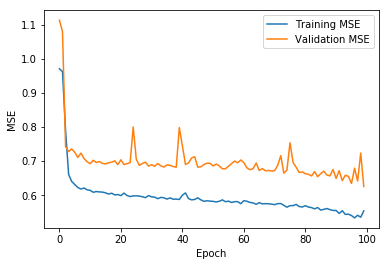

In [10]:
# Plot every epoch
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot(history.epoch,
         np.array(history.history['mean_squared_error']),
         label = "Training MSE"
         )
plt.plot(history.epoch,
         np.array(history.history['val_mean_squared_error']),
         label = "Validation MSE"
         )
plt.legend()
plt.show()
plt.close()

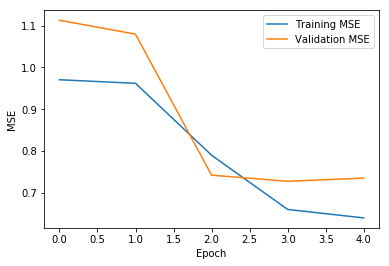

In [11]:
# Zoom in to the first few epochs
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot(history.epoch[0:5],
         np.array(history.history['mean_squared_error'])[0:5],
         label = "Training MSE"
        )
plt.plot(history.epoch[0:5],
        np.array(history.history['val_mean_squared_error'])[0:5],
        label = "Validation MSE"
        )
plt.legend()
plt.show()

In [12]:
# Pull random test cases
numSamples = 50
eval_set = data.sample(numSamples)
x_eval = eval_set[x_headers]
y_eval = eval_set[y_headers]
pd.options.mode.chained_assignment = None # Disable chained assignment warning; we know we're working on a copy here
y_eval["Predicted"] = nnet.predict(x_eval)
# Return data to original scale
mean_y = mean["ABV"]
sdev_y = sdev["ABV"]
for col in y_eval:
    y_eval[col] *= mean_y
    y_eval[col] += sdev_y
# Calculate Error
y_eval["Error"] = y_eval["ABV"] - y_eval["Predicted"]
print(y_eval)

             ABV  Predicted      Error
7982    6.607819   1.859112   4.748707
2478   38.971665  20.420414  18.551251
12511   4.179664   1.254019   2.925645
12190  -0.884775   1.311071  -2.195846
15715  -0.988839  -2.191125   1.202286
1290    0.121175  -1.028453   1.149628
19168  -6.365469   0.253539  -6.619008
5620    1.231189   3.633187  -2.401998
13765  -0.503208  -1.713431   1.210224
2963   -2.515108  -3.293592   0.778484
18818   0.641494   1.769480  -1.127985
11702  -0.364456   6.464799  -6.829256
15105   8.411592   8.860163  -0.448571
227     6.503755   6.655668  -0.151913
1739    2.653394   4.353665  -1.700271
5309    1.369941   5.249133  -3.879192
4698   -3.174179   0.716440  -3.890619
19766   0.849622   0.857182  -0.007561
17201   5.567181   3.625925   1.941257
9247    8.723783   1.480124   7.243659
18448  -4.110753   0.366609  -4.477363
20191  -0.086953   0.628772  -0.715725
4664   -2.549796  -2.047236  -0.502560
18348  -8.620185  -1.195883  -7.424302
13773  -1.023527   0.9672

In [6]:
x_headers

['Size',
 'OG',
 'FG',
 'Color',
 'BoilSize',
 'BoilTime',
 'BoilGravity',
 'Efficiency',
 'MashThickness',
 'PitchRate',
 'PrimaryTemp',
 'IBU']